In [1]:
pip install  wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
data = pd.read_csv("/kaggle/input/airline-four-dataset/airline_dataset.csv")

In [7]:
data.drop('negativereason_gold', axis=1, inplace=True)
data.drop('airline_sentiment_gold', axis=1, inplace=True)
data.drop('retweet_count', axis=1, inplace=True)
data.drop('tweet_coord', axis=1, inplace=True)

data.drop('tweet_location', axis=1, inplace=True)
data.drop('tweet_created', axis=1, inplace=True)
data.drop('user_timezone', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
#tweets.drop('',axis=1, inplace=True)

# Check the current list of columns
list(data.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'text']

**Data Preprocessing**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   text                          14640 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 800.8+ KB


In [9]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,@AmericanAir why would I even consider continu...
12059,570305051819941889,neutral,1.0,NaN,NaN,American,@AmericanAir my flight got Cancelled Flightled...
12063,570303383782989824,neutral,1.0,NaN,NaN,American,.@AmericanAir just disappointed with the Fligh...
12066,570301929580048385,neutral,1.0,NaN,NaN,American,@AmericanAir I did
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,@AmericanAir r u serious?? 304min #delay with ...
12069,570300915418320897,negative,1.0,Cancelled Flight,1.0,American,@AmericanAir You are jumping the gun and Cance...
12074,570299252141903873,positive,1.0,NaN,NaN,American,@AmericanAir This is exactly why ill be flying...
12075,570298770136674304,negative,1.0,Customer Service Issue,1.0,American,@AmericanAir This doesn't address my issue. I ...
12078,570298644475346945,negative,1.0,Customer Service Issue,1.0,American,@AmericanAir submitted a case to AA customer r...
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,@AmericanAir if by near the gate you mean sitt...


In [10]:
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = data.isna().sum()
missing_values

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
text                               0
dtype: int64

In [11]:
# removing duplicates

data.drop_duplicates(inplace = True)

# Remove the duplicate rows
data = data.drop_duplicates()

data['text'] = data['text'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
data["text"] = data['text'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
data["text_new"] = data["text"].apply(tokenizer.tokenize)
data["text_new"] = data["text_new"].apply(convert_list_to_str)


data

{'her', 'his', "mightn't", "you're", 'she', "they'd", 'isn', "haven't", 'where', "doesn't", 'him', 'at', 'i', 'wasn', 'needn', "couldn't", 'such', "you'll", 'your', "hadn't", 'ain', 'do', "it'll", 'ma', 'herself', 'in', 'weren', 'only', "she'll", 'once', 'after', 'out', 'yours', 'doesn', 're', 'mightn', 'into', 'what', 'whom', 'hers', "i'd", "he'll", 'who', "they'll", 'and', 'will', 'just', 'myself', 'did', "wasn't", 'hadn', "we're", 'own', 'should', 'been', 'why', 'can', 'further', 'have', 'an', 'the', "you'd", 'under', 'too', 'but', 'up', "needn't", 'off', 'for', "we'd", 'himself', 'then', 'd', "i've", 'my', 've', "you've", 'll', 'by', "mustn't", 'yourselves', 'they', 'same', 'm', 'so', 'here', 'hasn', 'won', 'against', "hasn't", 'because', 'all', 'were', 'as', 'some', 'those', 'be', 'before', 'y', 'no', 'theirs', 'if', 'it', 'are', 'from', 'other', "they've", "that'll", 'over', 'now', 'shan', "won't", "he'd", "she'd", 'how', 'haven', 'both', 'mustn', 'to', "don't", 'shouldn', "shoul

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,text_new
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,@virginamerica @dhepburn said.,virginamerica dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,@virginamerica plus added commercials experien...,virginamerica plus added commercials experienc...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,@virginamerica today... must mean need take an...,virginamerica today must mean need take anothe...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,@virginamerica really aggressive blast obnoxio...,virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,@virginamerica really big bad thing,virginamerica really big bad thing
...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,@americanair thank got different flight chicago.,americanair thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,@americanair leaving 20 minutes late flight. w...,americanair leaving 20 minutes late flight war...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,@americanair please bring american airlines #b...,americanair please bring american airlines bla...
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,"@americanair money, change flight, answer phon...",americanair money change flight answer phones ...


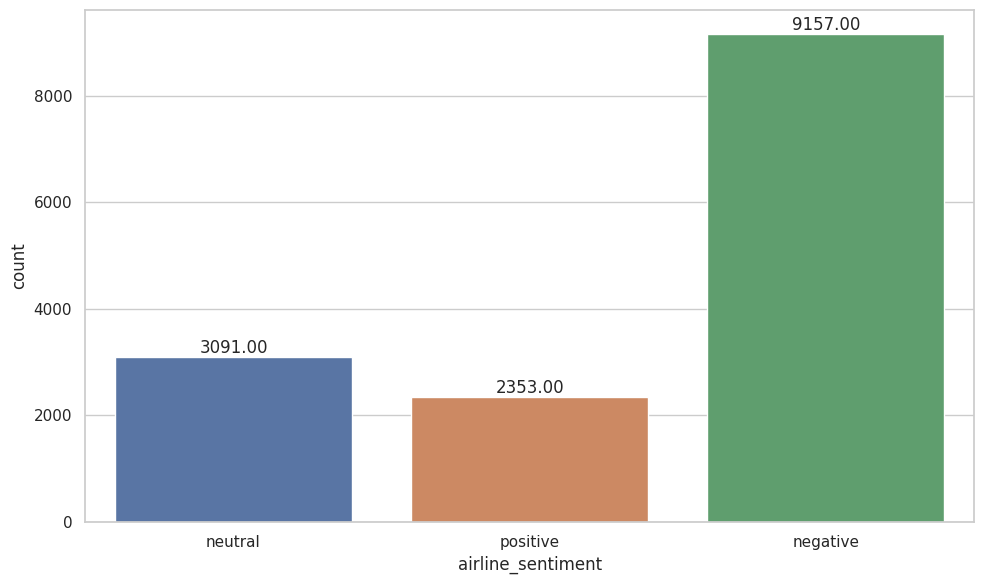

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline_sentiment', data=data)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


data = data[['text', 'airline_sentiment']].dropna()  # Select relevant columns and drop missing values

# Encode labels
le = LabelEncoder()
data['airline_sentiment'] = le.fit_transform(data['airline_sentiment'])
num_labels = len(le.classes_)

# Tokenizer setup
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Split dataset into train, validation, and test
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    data['text'].tolist(), data['airline_sentiment'].tolist(), test_size=0.3, random_state=42)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42)

# Define Dataset Class
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = TweetDataset(train_texts, train_labels, tokenizer)
val_dataset = TweetDataset(val_texts, val_labels, tokenizer)
test_dataset = TweetDataset(test_texts, test_labels, tokenizer)

# Define DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
model.to(device)

# Loss function & Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-2)

# Apply dropout regularization
for param in model.parameters():
    param.requires_grad = True
model.config.hidden_dropout_prob = 0.5
model.config.attention_probs_dropout_prob = 0.5

# Apply Gradient Clipping
max_grad_norm = 1.0

# Training Loop
epochs = 7
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    model.train()
    train_loss, correct_train, total_train = 0, 0, 0
    
    for batch in train_loader:
        input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        
        # Apply Gradient Clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        
        optimizer.step()
        
        train_loss += loss.item()
        predictions = torch.argmax(outputs.logits, dim=1)
        correct_train += (predictions == labels).sum().item()
        total_train += labels.size(0)
    
    train_loss /= len(train_loader)
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    
    # Validation Step
    model.eval()
    val_loss, correct_val, total_val = 0, 0, 0
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            val_loss += loss.item()
            predictions = torch.argmax(outputs.logits, dim=1)
            correct_val += (predictions == labels).sum().item()
            total_val += labels.size(0)
    
    val_loss /= len(val_loader)
    val_acc = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Save Model
torch.save(model.state_dict(), "distilbert_sentiment.pth")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda
Epoch 1/7, Train Loss: 0.6683, Train Acc: 0.7209, Val Loss: 0.4918, Val Acc: 0.8023
Epoch 2/7, Train Loss: 0.4814, Train Acc: 0.8117, Val Loss: 0.4658, Val Acc: 0.8174
Epoch 3/7, Train Loss: 0.4086, Train Acc: 0.8425, Val Loss: 0.4658, Val Acc: 0.8091
Epoch 4/7, Train Loss: 0.3288, Train Acc: 0.8795, Val Loss: 0.4644, Val Acc: 0.8196
Epoch 5/7, Train Loss: 0.2624, Train Acc: 0.9076, Val Loss: 0.5545, Val Acc: 0.8164
Epoch 6/7, Train Loss: 0.2061, Train Acc: 0.9323, Val Loss: 0.5778, Val Acc: 0.8160
Epoch 7/7, Train Loss: 0.1547, Train Acc: 0.9515, Val Loss: 0.6783, Val Acc: 0.8073


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Testing Accuracy: 0.8298
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1390
           1       0.70      0.60      0.65       464
           2       0.79      0.79      0.79       337

    accuracy                           0.83      2191
   macro avg       0.79      0.77      0.78      2191
weighted avg       0.82      0.83      0.83      2191



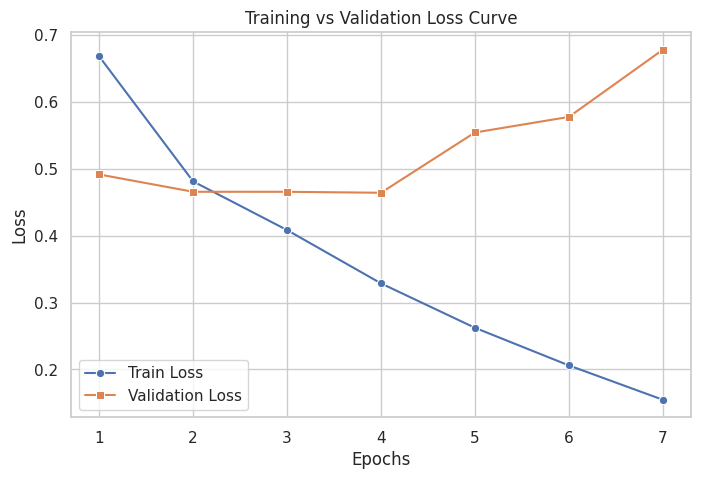

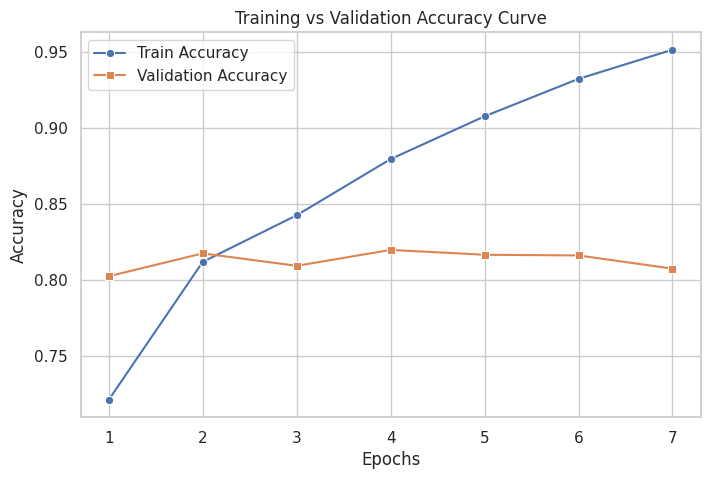

In [20]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)
model.load_state_dict(torch.load("distilbert_sentiment.pth"))
model.to(device)
model.eval()

# Evaluate Model
y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# Convert target names to string to fix TypeError
class_names = [str(label) for label in le.classes_]

# Compute Test Accuracy
val_accuracy = accuracy_score(y_true, y_pred)
print(f"Testing Accuracy: {val_accuracy:.4f}")

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Train & Test Loss
plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, marker='o', label='Train Loss')
sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, marker='s', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve")
plt.legend()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, len(train_accuracies) + 1), y=train_accuracies, marker='o', label='Train Accuracy')
sns.lineplot(x=range(1, len(val_accuracies) + 1), y=val_accuracies, marker='s', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy Curve")
plt.legend()
plt.show()